<a href="https://colab.research.google.com/github/prukac/Pytorch/blob/main/UIM_predzpracovani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from numpy.matlib import repmat
import random as rd
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import skimage
import pandas as pd
import csv
import imgaug.augmenters as iaa
from google.colab.patches import cv2_imshow
from skimage import io
import random

In [7]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
root_dir1 = "/content/drive/MyDrive/augmented/" #/MyDrive
base_dir1 = root_dir1

root_dir2 = "/content/drive/MyDrive/Gray/" #/MyDrive
base_dir2 = root_dir2


Mounted at /content/drive


In [95]:
fnames = os.listdir(base_dir1)
for filename in fnames:
  if "ipynb" in filename:
    pass
  else:
    nameofdir = filename
    nameofdir = '/'+nameofdir+'/'
    root_dir1 = "/content/drive/MyDrive/augmented/" #/MyDrive
    base_dir1 = root_dir1 + nameofdir
    fnames1 = os.listdir(base_dir1)
    for filename1 in fnames1:
      if "binary" in filename1:
        os.remove(base_dir1+'/'+filename1)




In [90]:
def binary_image(img):
  vertical_flattend = img.flatten()
  filter = np.random.randint(1,2, size=len(vertical_flattend))

  b = (vertical_flattend*filter) / 0.5
  new = np.array(b).reshape((60, 60))

  for i in range(len(b)):
    if b[i] > 170:
      b[i] = 0
    else:
      b[i] = 255

  new_img = np.array(b).reshape((60, 60))
  new_img = np.expand_dims(new_img,2)
  return new_img

In [92]:
def blur(img):
  x= (cv2.blur(img,(4,4)))
  x=np.expand_dims(x,2)
  return x
data_augmenter = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    fill_mode='nearest',
    #cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function= binary_image,
    #brightness_range=[0.5,1.5], #0 means no brightness (completely black), 1 means maximum brightness (no change), and anything above just makes the image brighter.
    dtype=None)

In [87]:
#vytvoreni, prvni varky augmentovanuch obrazku(bez bluru)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'#3 = INFO, WARNING, and ERROR messages are not printed
image_names = os.listdir(base_dir2)
for image_name in image_names:
    nameofdir = image_name.split('_')[0]
    nameofdir = '/'+nameofdir+'/'
    img = cv2.imread(f'{base_dir2}/{image_name}',1)
    img1 = cv2.resize(img,(60,60))
    gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray = np.expand_dims(gray, 2)
    # get the augmented image
    aug_img_iterator = data_augmenter.flow(x=np.expand_dims(gray,0),batch_size=2)
    aug_img=next(aug_img_iterator)

    # save the augmented image
    cv2.imwrite(f'{base_dir1}/{nameofdir}/{image_name}_binary_white',aug_img[0,:,:,:])

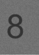

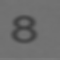

In [42]:
img = cv2.imread(base_dir2 + 'eight_001.png')
x=np.expand_dims(img,0)
cv2_imshow(img)
blur(img)
cv2_imshow(blur(img))
#img1 = cv2.resize(img,(60,60))
#gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#gray = np.expand_dims(gray, 2)

In [ ]:
#skript na zjisteni poctu zastoupeni jednotlivych obrazku v datasetu
pocet = 0 #pocet vyskytu obrazku v datasetu
fnames = os.listdir(base_dir) #zjisteni vsech nazvu souboru
celkem = 0
list_of_names = ['zero','one','two','three','four','five','six','seven','eight','nine']
for cislo in list_of_names:
  for name in fnames:
    if cislo in name:
      pocet+=1
  print('Pocet: ',cislo,'je ',pocet)
  celkem += pocet
  pocet = 0

Pocet:  zero je  267
Pocet:  one je  346
Pocet:  two je  330
Pocet:  three je  74
Pocet:  four je  251
Pocet:  five je  179
Pocet:  six je  274
Pocet:  seven je  265
Pocet:  eight je  360
Pocet:  nine je  220


In [ ]:
import imageio
image = cv2.imread(base_dir1 + 'eight_001.png',cv2.IMREAD_GRAYSCALE)
filename = 'eight_001.png'
nameofdir = filename.split('_')[0]
nameofdir = '/'+nameofdir+'/'


'/eight/'

In [ ]:
fnames=os.listdir(base_dir1)

for name in fnames:
  if name =='references.csv':
    pass
  else:
    img = Image.open(base_dir1 + name).convert('L')
    img.save(base_dir2 + name)

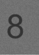

(60, 60, 1)

In [ ]:
img = cv2.imread(base_dir2 + 'eight_001.png')
img1 = cv2.resize(img,(60,60))
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray = np.expand_dims(gray, 2)
cv2_imshow(img)
gray.shape
#gut, ted pres flow vytvorim jednotlive image augmenty viz foto

In [ ]:
#prevedeni na grayscale pro snizeni vypocetni narocnosti + resize aby jsem mohl dale pouzit dataaugment techniku datagen flow


fnames = os.listdir(base_dir1)
for filename in fnames:
  if filename == 'references.csv': #vynecham tuto slozku
    pass
  else:
    nameofdir = filename.split('_')[0] #zisk jmena slozky
    nameofdir = '/'+nameofdir+'/'

    base_dir2 = root_dir2 + nameofdir

    img = cv2.imread(base_dir2 + filename)
    resize_img = cv2.resize(img,(60,60))
    gray = cv2.cvtColor(resize_img,cv2.COLOR_BGR2GRAY)
    gray = np.expand_dims(gray, 2)
    cv2.imwrite(base_dir2 + filename, gray)


In [ ]:
img = cv2.imread(base_dir2 + 'five_003.png',cv2.)
img.shape

(60, 60, 3)